# NOTE ::: THIS FEATURE SEEMS TO BE REDUNDANT - AVOIDING IT

reduces performance of the model

In [1]:
dataName = 'adani'
dataFrequency = '1h'
requiredMinimumCorrelation = .2
autoConfigFileRelativePath = '\\src\config\\autoConfig\\config.json'
KEY_finalTrainingFeaturesListFile='finalTrainingFeaturesListFile'
KEY_manuallyDecidedTrainingFeaturesListFile='manuallyDecidedTrainingFeaturesListFile'
prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile = '006'

TIME_STEPS_CONFIG=60
BATCH_SIZE_CONFIG = 512
LEARNING_RATE_CONFIG=0.001
EPOCHS_CONFIG = 40

print('done')

done


In [2]:
# Include python files defined in the library folder to help facilitate the stock price Prediction 
import os
import sys  

module_path = os.path.abspath('../../'+os.path.join('.'))

sys.path.append(module_path)

from utilities import *
from trainModel import *

print('done')

done


In [3]:
import pandas as pd
import numpy as np

from config.environment import getAppConfigData
from utilities.fileFolderManipulations import getJupyterRootDirectory

configFilePath = getJupyterRootDirectory()+'\\'+autoConfigFileRelativePath
autoConfigData = getAppConfigData()

trainingDataFilePath = autoConfigData[dataName][dataFrequency][KEY_manuallyDecidedTrainingFeaturesListFile]
trainingDataFilePath = trainingDataFilePath.replace('***',prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile)

print('trainingDataFilePath is >>> ' + trainingDataFilePath)

trainingDataDf = pd.read_csv(trainingDataFilePath)

try:
    trainingDataDf=trainingDataDf.drop(columns={'Unnamed: 0'})
except KeyError:
    pass


trainingDataDf.head()

 retrieving values configured in >>> C:\Users\kalagi01\Desktop\dev\eraiVersion2\\src\config\autoConfig\config.json
trainingDataFilePath is >>> C:\Users\kalagi01\Desktop\dev\eraiVersion2\data\adani\processed\1h\features\manuallyDecidedFeatures\006_manuallyDecidedFinalTrainingFeatureList.csv


,open,high,low,close,open_high_diff_exp_1,open_low_diff_exp_inv_1,close_low_diff_exp_inv_2,close_high_diff_exp_1,high_low_diff_exp_inv_2,data_magnitude,green_red_vector_pow_2,red_candle_magnitude_pow_4,green_candle_magnitude_pow_4,redCandlesBySizeTimesMagnitude_pow_3
0,52.50,52.70,51.30,51.65,0.818731,0.301194,0.496585,0.349938,0.060810,26.020368,677.059531,458409.6089,0.0000,-2202167.238
1,51.70,52.30,51.70,51.85,0.548812,1.000000,0.740818,0.637628,0.301194,25.944041,673.093281,0.0000,453054.5653,0.000
2,51.85,52.10,51.75,51.95,0.778801,0.904837,0.670320,0.860708,0.496585,25.956331,673.731094,0.0000,453913.5867,0.000
3,51.90,52.15,51.90,52.05,0.778801,1.000000,0.740818,0.904837,0.606531,26.000054,676.002813,0.0000,456979.8025,0.000
4,52.10,52.20,51.85,51.90,0.904837,0.778801,0.904837,0.740818,0.496585,26.006348,676.330156,457422.4803,0.0000,-474899.697


In [4]:
trainingDataDf.corr()

,open,high,low,close,open_high_diff_exp_1,open_low_diff_exp_inv_1,close_low_diff_exp_inv_2,close_high_diff_exp_1,high_low_diff_exp_inv_2,data_magnitude,green_red_vector_pow_2,red_candle_magnitude_pow_4,green_candle_magnitude_pow_4,redCandlesBySizeTimesMagnitude_pow_3
open,1.000000,0.999541,0.999531,0.999298,-0.266702,-0.301008,-0.290095,-0.363132,-0.453788,0.999786,0.901418,0.601855,0.536609,-0.464503
high,0.999541,1.000000,0.999257,0.999678,-0.293119,-0.293140,-0.307125,-0.366613,-0.466815,0.999819,0.902617,0.593542,0.546420,-0.457274
low,0.999531,0.999257,1.000000,0.999613,-0.273983,-0.275037,-0.285133,-0.344964,-0.440574,0.999785,0.900237,0.594226,0.544062,-0.450526
close,0.999298,0.999678,0.999613,1.000000,-0.291301,-0.277944,-0.307312,-0.345216,-0.454519,0.999840,0.901416,0.587961,0.551389,-0.446462
open_high_diff_exp_1,-0.266702,-0.293119,-0.273983,-0.291301,1.000000,-0.230885,0.661281,0.186521,0.585127,-0.281468,-0.290342,0.127356,-0.492448,-0.139069
open_low_diff_exp_inv_1,-0.301008,-0.293140,-0.275037,-0.277944,-0.230885,1.000000,0.208128,0.686746,0.595424,-0.286970,-0.301783,-0.456687,0.124003,0.594171
close_low_diff_exp_inv_2,-0.290095,-0.307125,-0.285133,-0.307312,0.661281,0.208128,1.000000,0.061976,0.694446,-0.297630,-0.311785,0.055135,-0.425764,-0.013714
close_high_diff_exp_1,-0.363132,-0.366613,-0.344964,-0.345216,0.186521,0.686746,0.061976,1.000000,0.693611,-0.355214,-0.371577,-0.439237,0.011834,0.569475
high_low_diff_exp_inv_2,-0.453788,-0.466815,-0.440574,-0.454519,0.585127,0.595424,0.694446,0.693611,1.000000,-0.454184,-0.479960,-0.268461,-0.280188,0.361360
data_magnitude,0.999786,0.999819,0.999785,0.999840,-0.281468,-0.286970,-0.297630,-0.355214,-0.454184,1.000000,0.901609,0.594504,0.544738,-0.454823


In [5]:
from utilities.dataVisuvalization import displayHeatMap
displayHeatMap(trainingDataDf.corr())
print('done')

done


In [6]:
numberOfInputFeatures = trainingDataDf.shape[1]
numberOfOutputFeatures = 4

numberOfInputFeatures,numberOfOutputFeatures

(14, 4)

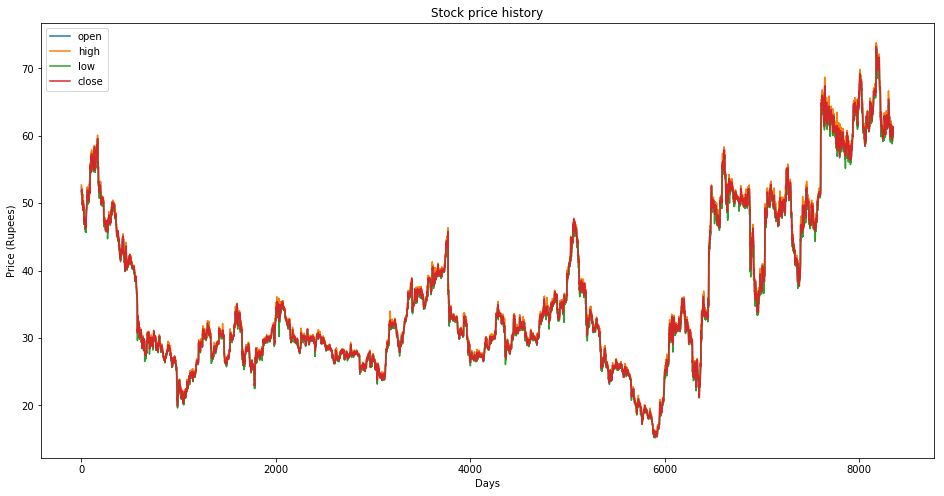

done


In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(trainingDataDf["open"])
plt.plot(trainingDataDf["high"])
plt.plot(trainingDataDf["low"])
plt.plot(trainingDataDf["close"])
plt.title('Stock price history')
plt.ylabel('Price (Rupees)')
plt.xlabel('Days')
plt.legend(['open','high','low','close'], loc='upper left')
plt.show()
print('done')

Using TensorFlow backend.
W0110 21:44:33.410480  7880 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0110 21:44:33.489481  7880 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0110 21:44:33.494481  7880 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



checking if any null values are present
 open                                    0
high                                    0
low                                     0
close                                   0
open_high_diff_exp_1                    0
open_low_diff_exp_inv_1                 0
close_low_diff_exp_inv_2                0
close_high_diff_exp_1                   0
high_low_diff_exp_inv_2                 0
data_magnitude                          0
green_red_vector_pow_2                  0
red_candle_magnitude_pow_4              0
green_candle_magnitude_pow_4            0
redCandlesBySizeTimesMagnitude_pow_3    0
dtype: int64
Train and Test size 5010 3340
length of time-series i/o (4950, 60, 14) (4950, 4)
length of time-series i/o (3280, 60, 14) (3280, 4)


W0110 21:44:33.853505  7880 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



 checking if folder existis >>>C:\Users\kalagi01\Desktop\dev\eraiVersion2\data\adani\processed\1h\features\manuallyDecidedFeatures/logs


W0110 21:44:34.073527  7880 deprecation.py:323] From C:\Users\kalagi01\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0110 21:44:34.497551  7880 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0110 21:44:34.506546  7880 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 4608 samples, validate on 1536 samples
Epoch 1/40
 - 2s - loss: 0.0582 - acc: 0.1289 - val_loss: 0.0740 - val_acc: 0.2852
Epoch 2/40
 - 1s - loss: 0.0366 - acc: 0.2068 - val_loss: 0.0595 - val_acc: 0.2852
Epoch 3/40
 - 1s - loss: 0.0344 - acc: 0.2068 - val_loss: 0.0564 - val_acc: 0.2852
Epoch 4/40
 - 1s - loss: 0.0332 - acc: 0.6035 - val_loss: 0.0546 - val_acc: 0.4870
Epoch 5/40
 - 1s - loss: 0.0323 - acc: 0.6172 - val_loss: 0.0529 - val_acc: 0.4870
Epoch 6/40
 - 1s - loss: 0.0312 - acc: 0.6239 - val_loss: 0.0510 - val_acc: 0.4870
Epoch 7/40
 - 1s - loss: 0.0301 - acc: 0.6226 - val_loss: 0.0487 - val_acc: 0.4811
Epoch 8/40
 - 1s - loss: 0.0286 - acc: 0.6278 - val_loss: 0.0457 - val_acc: 0.4876
Epoch 9/40
 - 1s - loss: 0.0261 - acc: 0.6276 - val_loss: 0.0414 - val_acc: 0.4668
Epoch 10/40
 - 1s - loss: 0.0230 - acc: 0.5959 - val_loss: 0.0356 - val_acc: 0.4674
Epoch 11/40
 - 1s - loss: 0.0188 - acc: 0.5195 - val_loss: 0.0286 - val_acc: 0.4603
Epoch 12/40
 - 1s - loss: 0.0139 - ac

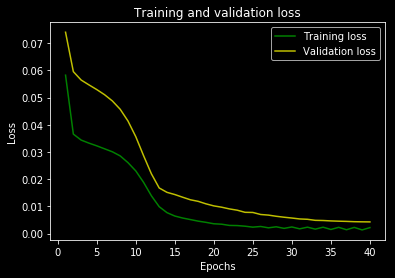

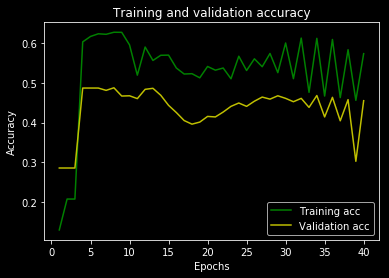

isSuccess >>> True


In [8]:
from trainModel.trainModel import trainLSTMModel
success, trainingData, min_max_scaler, x_t, y_t,x_test_t, y_test_t, lstm_model, history = trainLSTMModel(trainingDataFilePath, TIME_STEPS_CONFIG, BATCH_SIZE_CONFIG , LEARNING_RATE_CONFIG, EPOCHS_CONFIG)
print('isSuccess >>> ' + str(success))

In [9]:
predicted_values = lstm_model.predict(x_test_t, batch_size=512)
predicted_values.shape

(1536, 4)

In [10]:
dummy_cols_data = np.random.random((predicted_values.shape[0],numberOfInputFeatures-numberOfOutputFeatures))
predicted_values_adj = np.append(predicted_values, dummy_cols_data, 1)
predicted_values_orig_scale_withDummies=min_max_scaler.inverse_transform(predicted_values_adj)

y_test_t_adj = np.append(y_test_t, dummy_cols_data, 1)
y_test_t_orig_scale_withDummies=min_max_scaler.inverse_transform(y_test_t_adj)
print('done')

done


In [11]:
predicted_values_orig_scale= predicted_values_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
y_test_t_orig_scale= y_test_t_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
predicted_values_orig_scale.shape

(1536, 4)

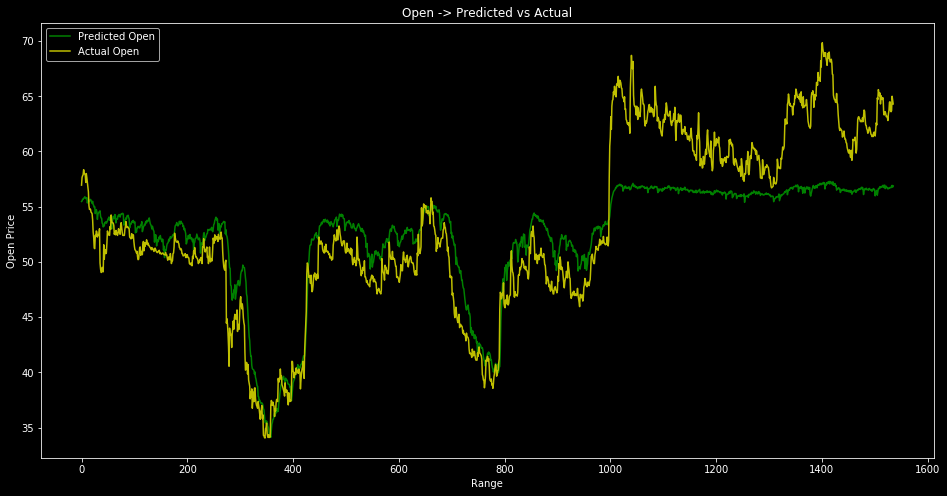

In [12]:
plt.figure(figsize=(16,8))
plt.clf()
predicted_open = predicted_values_orig_scale[:,[0]]
actual_open = y_test_t_orig_scale[:,[0]]

x_coord = [ index for index in range(predicted_values_orig_scale.shape[0]) ]

plt.plot(x_coord, predicted_open, 'g', label='Predicted Open')
plt.plot(x_coord, actual_open, 'y', label='Actual Open')
plt.title('Open -> Predicted vs Actual')
plt.xlabel('Range')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# Save trained model for future use

In [13]:
import pickle
from utilities.fileFolderManipulations import getParentFolder
from utilities.fileFolderManipulations import createFolder

modelFolderPath=getParentFolder(trainingDataFilePath)+"\model"
modelFilePath = modelFolderPath+"\lstm_model_for_"+trainingDataFilePath[trainingDataFilePath.rfind('\\')+1:trainingDataFilePath.rfind('.csv')]+".sav"
createFolder(modelFolderPath)

pickle.dump(lstm_model, open(modelFilePath, 'wb'))
print('done')

 checking if folder existis >>>C:\Users\kalagi01\Desktop\dev\eraiVersion2\data\adani\processed\1h\features\manuallyDecidedFeatures\model
done


# Load Model from disk

In [14]:
import pickle
lstm_model_loaded = pickle.load(open(modelFilePath, 'rb'))
result = lstm_model_loaded.evaluate(x_t, y_t, batch_size=512)
actual = lstm_model.evaluate(x_t, y_t, batch_size=512)
print('done')
actual, result

4608/4608 [==============================] - 0s 67us/step
done


([0.0008710037509445101, 0.611328125], [0.0008691044511376984, 0.611328125])